In [83]:
##SETUP ADN DATA MERGE
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
drug_df = pd.read_csv(mouse_drug_data_to_load)
trial_df = pd.read_csv(clinical_trial_data_to_load)
trial_df
# Combine the data into a single dataset
comb_drug_trial_df = pd.merge(drug_df, trial_df, how='outer', on='Mouse ID')

# Display the data table for preview
comb_drug_trial_df.head()




,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [84]:
##TUMOR RESPONSE TO TREATMENT MEAN
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

#Group by drug and timepoint 
comb_drug_trial_df.groupby("Drug")["Timepoint"].count()
tumor_response_mean = comb_drug_trial_df.groupby(["Drug", "Timepoint"])

# Convert series to data frame using .to_frame() (without this would appear as plain text)
tumor_vol_by_drug_timepoint_df = tumor_response_mean["Tumor Volume (mm3)"].mean().to_frame()
# Preview DataFrame
tumor_vol_by_drug_timepoint_df.head()






Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [85]:
##TUMOR RESPONSE TO TREATMENT STANDARD ERROR
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
comb_drug_trial_df.groupby("Drug")["Timepoint"].count()
tumor_response_mean = comb_drug_trial_df.groupby(["Drug", "Timepoint"])

# Convert series to data frame using .to_frame() (without this would appear as plain text)
tumor_sem_by_drug_timepoint_df = tumor_response_mean["Tumor Volume (mm3)"].sem().to_frame()
# Preview DataFrame
tumor_sem_by_drug_timepoint_df.head()






Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [86]:
##PREP FOR CHART 
# Minor Data Munging to Re-Format the Data Frames
#df's must be altered to pivottables in order to be graphed properly 
tumor_sem_chart = tumor_sem_by_drug_timepoint_df.pivot_table('Tumor Volume (mm3)', ['Timepoint'],'Drug' )
tumor_vol_chart = tumor_vol_by_drug_timepoint_df.pivot_table('Tumor Volume (mm3)', ['Timepoint'],'Drug' )

# Preview that Reformatting worked
print(tumor_vol_chart)
print(tumor_sem_chart)



Drug       Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol    Placebo  \
Timepoint                                                                     
0          45.000000  45.000000  45.000000  45.000000  45.000000  45.000000   
5          44.266086  46.503051  47.062001  47.389175  46.796098  47.125589   
10         43.084291  48.285125  49.403909  49.582269  48.694210  49.423329   
15         42.064317  50.094055  51.296397  52.399974  50.933018  51.359742   
20         40.716325  52.157049  53.197691  54.920935  53.644087  54.364417   
25         39.939528  54.287674  55.715252  57.678982  56.731968  57.482574   
30         38.769339  56.769517  58.299397  60.994507  59.559509  59.809063   
35         37.816839  58.827548  60.742461  63.371686  62.685087  62.420615   
40         36.958001  61.467895  63.162824  66.068580  65.600754  65.052675   
45         36.236114  64.132421  65.755562  70.662958  69.265506  68.084082   

Drug        Propriva   Ramicane   Stelasyn  Zonifer

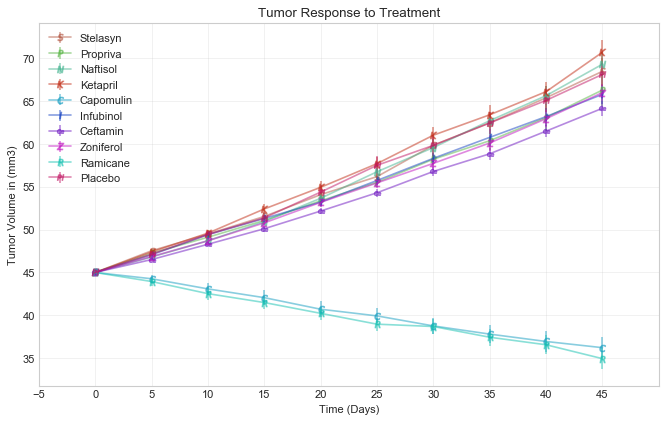

In [87]:
#PLOT TUMOR RESPONSE TO TREATMENT
#Set the x_axis, figure size, and xlim for the line graphs with drugs in the legend.
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
x_axis = np.arange(0, 50, 5)
drugs = comb_drug_trial_df["Drug"].unique()
count = np.arange(0,len(drugs))
plt.xlim(0,50)

#Set colorts and markers 
colors = ['#B45844','#57B444','#44B490','#C12C15','#159DC1','#1542C1','#6D15C1','#C115C1','#15C1B1','#C11563']
markers = ['$S$','$P$','$N$','$K$','$C$','$I$','$Ce$','$Z$','$R$','$Pl$']

#Format graph and display labels
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume in (mm3)")
plt.grid(alpha = 0.3)

#Start for loop and plot points + error bars
for i in count:
    standard_errors = stats.sem(tumor_sem_chart[drugs[i]])
    plt.errorbar(x_axis, tumor_vol_chart[drugs[i]], yerr = tumor_sem_chart[drugs[i]], marker= markers[i], color= colors[i], alpha = 0.5, label = drugs[i])
plt.legend(loc="best")
plt.xticks(np.arange(min(x_axis)-5, max(x_axis)+5, 5.0))

#Show line graph
plt.show()


## Metastatic Response to Treatment

In [88]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
comb_drug_trial_df.groupby("Drug")["Timepoint"].count()
tumor_met_mean = comb_drug_trial_df.groupby(["Drug", "Timepoint"])
# Convert to DataFrame
tumor_met_mean_by_drug_timepoint_df = tumor_met_mean["Metastatic Sites"].mean().to_frame()
# Preview DataFrame
tumor_met_mean_by_drug_timepoint_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [89]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
comb_drug_trial_df.groupby("Drug")["Timepoint"].count()
tumor_met_sem = comb_drug_trial_df.groupby(["Drug", "Timepoint"])
# Convert to DataFrame
tumor_met_sem_by_drug_timepoint_df = tumor_met_mean["Metastatic Sites"].sem().to_frame()
# Preview DataFrame
tumor_met_sem_by_drug_timepoint_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [90]:
# Minor Data Munging to Re-Format the Data Frames
tumor_met_sem_chart = tumor_met_sem_by_drug_timepoint_df.pivot_table('Metastatic Sites', ['Timepoint'],'Drug' )
tumor_met_mean_chart = tumor_met_mean_by_drug_timepoint_df.pivot_table('Metastatic Sites', ['Timepoint'],'Drug' )

# Preview that Reformatting worked
print(tumor_met_sem_chart)
print(tumor_met_mean_chart)

Drug       Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol   Placebo  \
Timepoint                                                                 
0           0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   
5           0.074833  0.108588   0.091652  0.098100  0.093618  0.100947   
10          0.125433  0.152177   0.159364  0.142018  0.163577  0.115261   
15          0.132048  0.180625   0.194015  0.191381  0.158651  0.190221   
20          0.161621  0.241034   0.234801  0.236680  0.181731  0.234064   
25          0.181818  0.258831   0.265753  0.288275  0.185240  0.263888   
30          0.172944  0.249479   0.227823  0.347467  0.266667  0.300264   
35          0.169496  0.266526   0.224733  0.361418  0.330464  0.341412   
40          0.175610  0.289128   0.314466  0.315725  0.321702  0.297294   
45          0.202591  0.286101   0.309320  0.278722  0.351104  0.304240   

Drug       Propriva  Ramicane  Stelasyn  Zoniferol  
Timepoint                                     

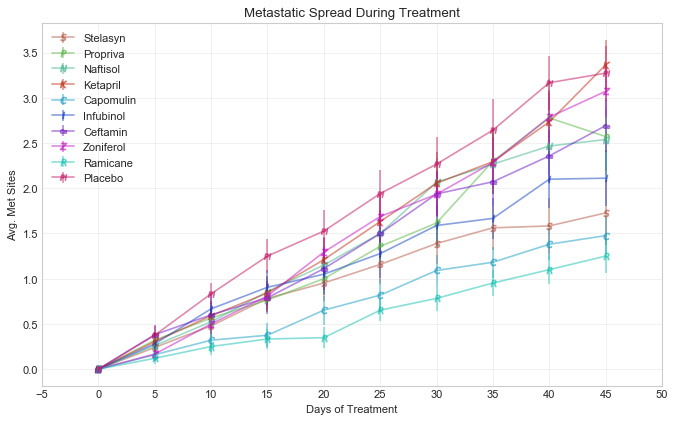

In [91]:
##PLOT METASTATIC SPREAD DURING TREATMENT
#Set the x_axis, figure size, and xlim for the line graphs with drugs in the legend
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
x_axis = np.arange(0, 50, 5)
drugs = comb_drug_trial_df["Drug"].unique()
count = np.arange(0,len(drugs))

#Set colorts and markers 
colors = ['#B45844','#57B444','#44B490','#C12C15','#159DC1','#1542C1','#6D15C1','#C115C1','#15C1B1','#C11563']
markers = ['$S$','$P$','$N$','$K$','$C$','$I$','$Ce$','$Z$','$R$','$Pl$']

#Format graph and display labels
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Days of Treatment")
plt.ylabel("Avg. Met Sites")
plt.grid(alpha = 0.3)

#Start for loop and plot points + error bars
for i in count:
    chart_data = stats.sem(tumor_met_sem_chart[drugs[i]])
    plt.errorbar(x_axis, tumor_met_mean_chart[drugs[i]], yerr = tumor_met_sem_chart[drugs[i]], marker= markers[i], color= colors[i], alpha = 0.5, label = drugs[i])
plt.legend(loc="best")
plt.xticks(np.arange(min(x_axis)-5, max(x_axis)+10, 5.0))
plt.show()






## Survival Rates

In [92]:
#Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_gone_count = comb_drug_trial_df.groupby(["Drug", "Timepoint"])["Mouse ID"].count()

#Convert to DataFrame and rename 
mouse_frame = mouse_gone_count.to_frame()
mouse_frame = mouse_frame.rename(columns={"Mouse ID": "Mouse Count"})
mouse_frame.head()



Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [93]:
##PREP FOR CHART 
#Minor Data Munging to Re-Format the Data Frames
mouse_frame_chart = mouse_frame.pivot_table('Mouse Count', ['Timepoint'],'Drug')
#Preview the Data Frame
percent_surviving = (1-(mouse_frame_chart.iloc[0]- mouse_frame_chart)/mouse_frame_chart.iloc[0])*100
percent_surviving.head(10)


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,53.846154,92.0,73.076923,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,50.000000,92.0,69.230769,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,38.461538,84.0,61.538462,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,34.615385,80.0,46.153846,56.0


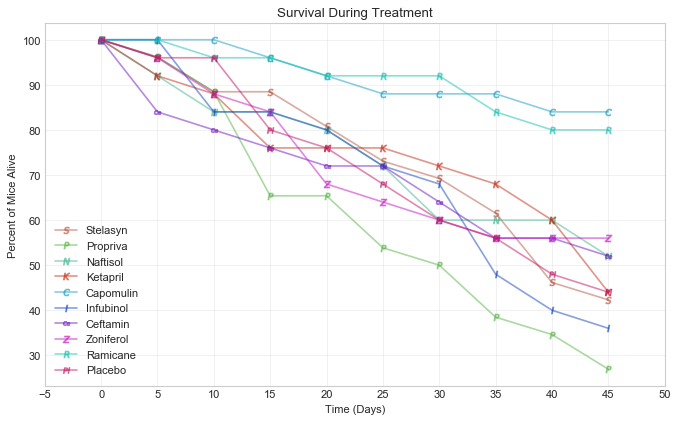

In [105]:
##PLOT SURVIVAL DURING TREATMENT
#Set the x_axis, figure size, and xlim for the line graphs with drugs in the legend
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
x_axis = np.arange(0, 50, 5)
drugs = comb_drug_trial_df["Drug"].unique()
count = np.arange(0,len(drugs))

#Set colorts and markers 
colors = ['#B45844','#57B444','#44B490','#C12C15','#159DC1','#1542C1','#6D15C1','#C115C1','#15C1B1','#C11563']
markers = ['$S$','$P$','$N$','$K$','$C$','$I$','$Ce$','$Z$','$R$','$Pl$']

#Plot, format graph, and add  x/y labels
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Percent of Mice Alive")
plt.grid(alpha = 0.3)

#Start for loop and plot points + error bars
for i in count:
    chart_data = stats.sem(percent_surviving[drugs[i]])
    plt.errorbar(x_axis, percent_surviving[drugs[i]], marker= markers[i], color= colors[i], alpha = 0.5, label = drugs[i])
plt.legend(loc="best")
plt.xticks(np.arange(min(x_axis)-5, max(x_axis)+10, 5.0))
plt.show()

In [95]:
tumor_vol_chart_first_and_last = tumor_vol_chart.iloc[[0,-1]]
tumor_vol_chart_first_and_last

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.00000,45.000000
45,36.236114,64.132421,65.755562,70.662958,69.265506,68.084082,66.258529,34.955595,68.43831,65.960888


In [96]:

# Get % tumur volume change
tumor_vol_diff_change = ((tumor_vol_chart_first_and_last -tumor_vol_chart_first_and_last.iloc[0])/tumor_vol_chart_first_and_last.iloc[0])*100
tumor_vol_diff_change

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000
45,-19.475303,42.516492,46.123472,57.028795,53.923347,51.29796,47.241175,-22.3209,52.085134,46.579751


In [97]:
percent_diff_overall = tumor_vol_diff_change.loc[1:]
percent_diff_overall.sum()


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

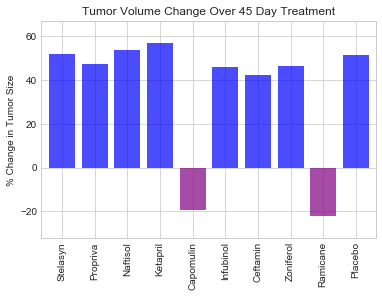

In [98]:
##PLOT TUMOR VOLUME CHANGE OVER 45 DAY TREATMENT
#Create an empty performance dictionary
performance = {}

#Start the for loop to see % change in tumour size fo each drug name
for x in count:
    performance[drugs[x]] = float(percent_diff_overall[drugs[x]])
x_axis = np.arange(0, len(drugs))

#Create an empty tick list
tick_locations = []

#Start the for loop to append the drig names to the ticks
for x in x_axis:
    tick_locations.append(x + 0.4)

#Plot bar chart, format, and add  x/y labels/ticks    
plt.xlim(-0.25, len(drugs))
plt.ylim(min(performance.values()) - 10, max(performance.values()) + 10)
plt.title("Tumor Volume Change Over 45 Day Treatment")
plt.ylabel("% Change in Tumor Size")
bar_colors = pd.Series(list(performance.values()))
bar_colors = bar_colors <= 0
bar_colors = bar_colors.map({True: "Purple", False: "Blue"})
plt.xticks(tick_locations, performance, rotation="vertical" )
plt.bar(x_axis, performance.values(), color =bar_colors, alpha=0.7, align="edge")

#Show bar chart
plt.show()